Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

Loading Data

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


EDA Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<ipython-input-6-1e5770087026>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette="pastel")


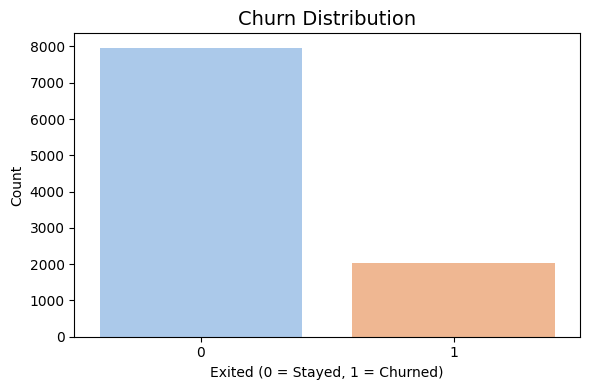

In [6]:
# 1. Churn Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df, palette="pastel")
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Exited (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<ipython-input-7-ed95372a029e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette=["#6A5ACD", "#FF69B4"])


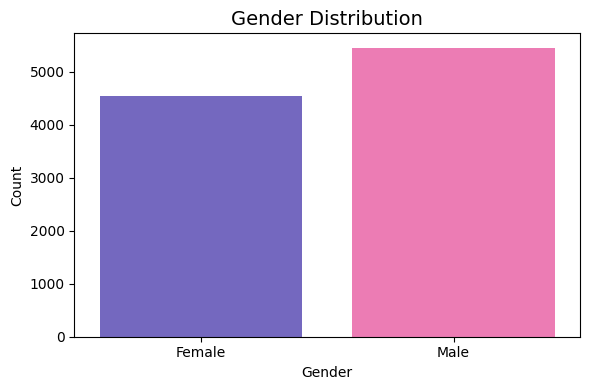

In [7]:
# 2. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette=["#6A5ACD", "#FF69B4"])
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

<ipython-input-8-d1b04c45e3b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Geography', data=df, palette="pastel")


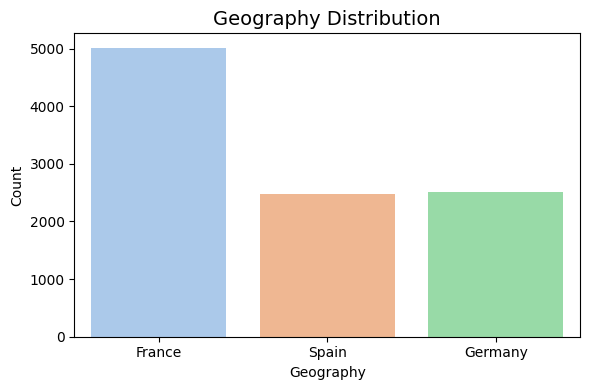

In [8]:
# 3. Geography Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Geography', data=df, palette="pastel")
plt.title("Geography Distribution", fontsize=14)
plt.xlabel("Geography")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

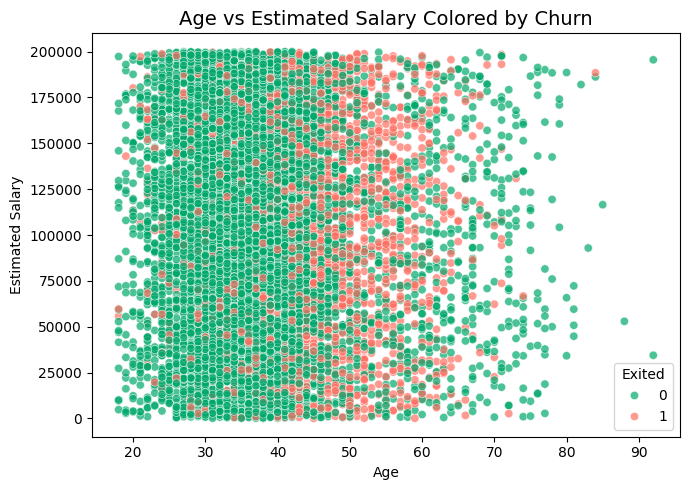

In [9]:
# 4. Age vs Estimated Salary colored by churn
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Exited', data=df, palette=["#00A86B", "#FF6F61"], alpha=0.7)
plt.title("Age vs Estimated Salary Colored by Churn", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend(title="Exited")
plt.tight_layout()
plt.show()

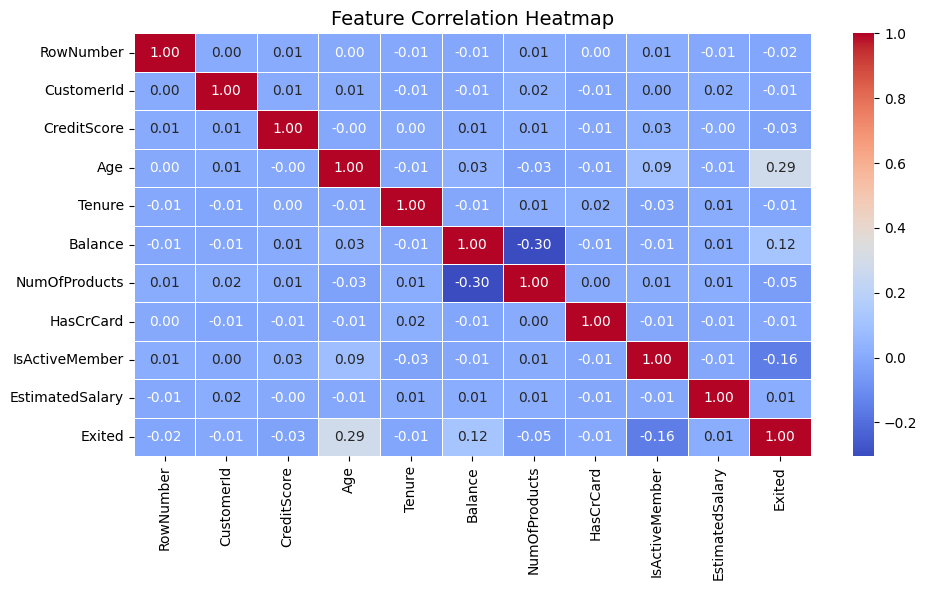

In [10]:
# 5. Correlation Heatmap
df_corr = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

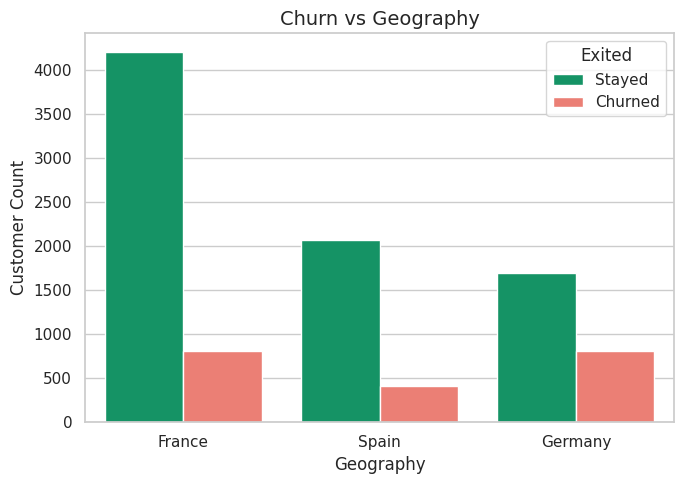

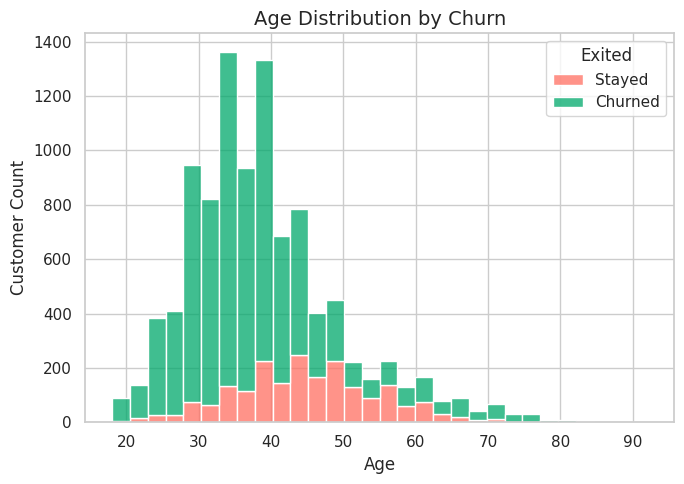

In [11]:
# Set Seaborn style
sns.set(style="whitegrid")

# Bar Chart: Churn vs Geography
plt.figure(figsize=(7, 5))
sns.countplot(x='Geography', hue='Exited', data=df, palette=["#00A86B", "#FF6F61"])
plt.title("Churn vs Geography", fontsize=14)
plt.xlabel("Geography")
plt.ylabel("Customer Count")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.tight_layout()
plt.show()

# Histogram: Age distribution colored by churn
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', bins=30, palette=["#00A86B", "#FF6F61"])
plt.title("Age Distribution by Churn", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Customer Count")
plt.legend(title="Exited", labels=["Stayed", "Churned"])
plt.tight_layout()
plt.show()

Data Preprocessing

In [12]:
# Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Encode categorical variables
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Define X and y
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training (Logistic, Random Forest, SVM)

In [13]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}
# GridSearchCV
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid.fit(X_train, y_train)
y_pred_rf = grid.predict(X_test)

# SVM
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

Evaluating the Model

In [14]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n---{model_name}---")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")


---Logistic Regression---
[[1543   64]
 [ 314   79]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


---Random Forest---
[[1553   54]
 [ 220  173]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000


---SVM---
[[1562   45]
 [ 243  150]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.8

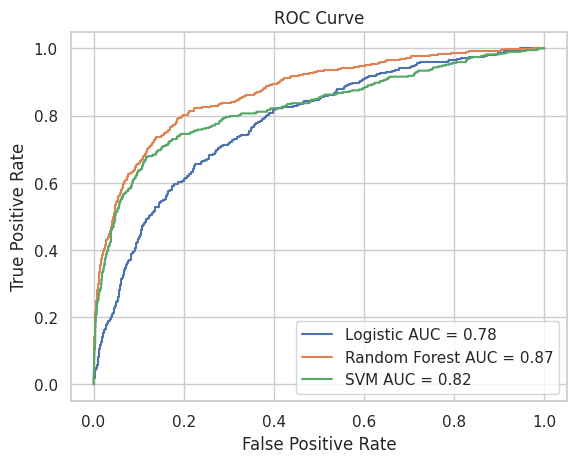

In [15]:
# ROC-AUC
for model, name in zip([lr, grid, svm], ["Logistic", "Random Forest", "SVM"]):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, label=f'{name} AUC = {roc_auc_score(y_test, y_score):.2f}')

plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Random Forest Model fits the data the best.

<ipython-input-19-906bf4d56836>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='mako')


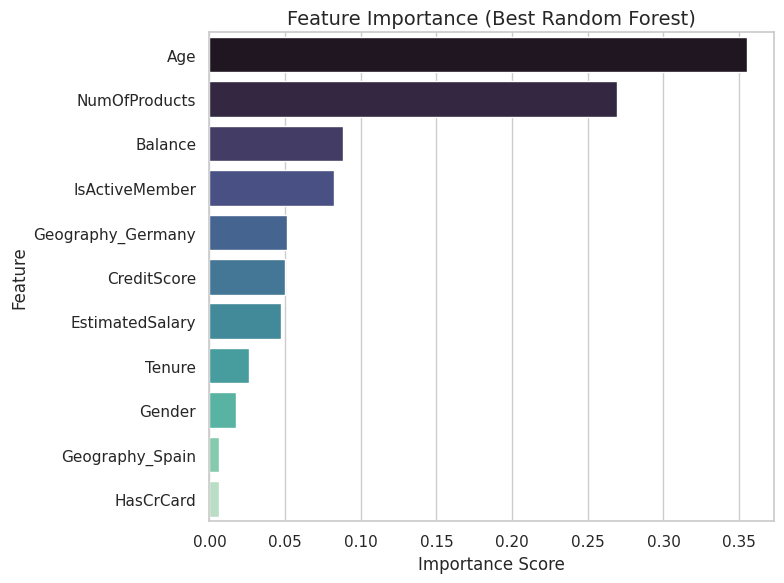

In [19]:
# Feature Importance plot for Random Forest
# Extract best estimator
best_rf = grid.best_estimator_

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Now plot the feature importances
importances = best_rf.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='mako')
plt.title("Feature Importance (Best Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Random Forest further evaluation

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best model
y_pred = grid.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Stayed", "Churned"]))

# Business Interpretation
print("\n--- Business Impact ---")
print(f"True Positives  (TP): {tp} → Correctly predicted churns (good)")
print(f"True Negatives  (TN): {tn} → Correctly predicted retained customers")
print(f"False Positives (FP): {fp} → Predicted churn but customer stayed → Costly unnecessary retention effort")
print(f"False Negatives (FN): {fn} → Missed churn prediction → Lost revenue opportunity (critical!)")

Confusion Matrix:
[[1553   54]
 [ 220  173]]

Classification Report:
              precision    recall  f1-score   support

      Stayed       0.88      0.97      0.92      1607
     Churned       0.76      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000


--- Business Impact ---
True Positives  (TP): 173 → Correctly predicted churns (good)
True Negatives  (TN): 1553 → Correctly predicted retained customers
False Positives (FP): 54 → Predicted churn but customer stayed → Costly unnecessary retention effort
False Negatives (FN): 220 → Missed churn prediction → Lost revenue opportunity (critical!)
